In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [27]:
def animate(ydata, fileName, title=""):
    xdata = np.linspace(0,1,len(res[0]))
    fig, ax = plt.subplots()
    line, = ax.plot(xdata, ydata[0], label="time evolution")
    initial_line = ax.plot(xdata, ydata[0], "--", label="initial condition")
    ax.legend(loc="upper right")
    ax.set_ylim([np.min(ydata), 1.1*np.max(ydata)])
    ax.set_title(title)
    global i
    i = 0

    def animate(i):
        line.set_ydata(ydata[i])
        i = i+1
        return line,


    ani = animation.FuncAnimation(fig, animate, frames=len(res))
    ani.save(fileName+".gif", fps=30, writer='imagemagick')

    fig.savefig(fileName+".png")

    return ani

0.09999999999999999


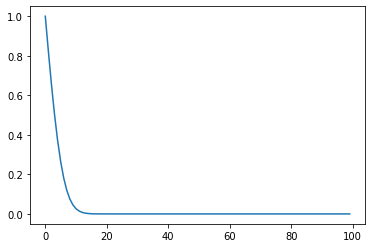

In [28]:
Nx = 100
dt = 10
dx = (1/(Nx+0))
D = 10**(-6)
S = D*dt/(dx*dx)



def apply_boundaries(C):
    C[0] = 1
    C[-1] = C[-2]
    return C

def advance(C):
    new_C = np.empty(len(C))
    for i in range(1, len(C)-1):
        new_C[i] = C[i] + S*(C[i-1] - 2*C[i] + C[i+1])
    apply_boundaries(new_C)
    return np.abs(new_C)

C = np.zeros(Nx)
C = apply_boundaries(C)
res = [C]

for i in range(100):
    C = advance(C)
    res.append(C)

#plt.yscale("log")
print(S)
plt.plot(C)

## Ex 3.2 - Upwind

$$
\frac{\partial C_i}{\partial t} = U \cdot \frac{\partial C_i}{\partial x}
$$

MovieWriter imagemagick unavailable; using Pillow instead.


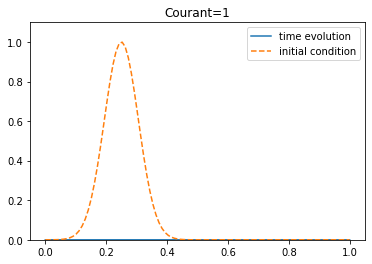

In [14]:
dx = 0.01
Nx = int(1/dx)
x_vals = np.linspace(0,1, Nx)


def gauss(x):
    return np.exp(-10.*np.power(4*x-1,2))

def square(x):
    if hasattr(x, "__len__"): return [square(xi) for xi in x]
    if(0.1 < x) and (x < 0.3): return 1.
    else: return 0.

def advance_upwind(C, Co):
    new_C = np.copy(C)
    for i in range(1, len(C)):
        new_C[i] = (1 - Co) * C[i] + Co * C[i-1]
    return new_C

def analytical_sol_advection(initFunc, steps):
    x_vals = np.linspace(0,1, Nx)
    c= 1
    return [initFunc(x_vals-c*t) for t in np.linspace(0,1,steps)]


def simulate_advetion(initFunc, Co, steps):
    x_vals = np.linspace(0,1, Nx)
    C = initFunc(x_vals)

    res = []
    for i in range(steps):
        C = advance_upwind(C, Co)
        res.append(C)

    res = np.array(res)
    return res

res = analytical_sol_advection(gauss, 2)
animate(res, "out/task2_gauss_co_1", title="Courant=1")

## Task 2 - Gauss Pulses

MovieWriter imagemagick unavailable; using Pillow instead.


array([[4.53999298e-05, 4.53999298e-05, 1.00209851e-04, ...,
        1.01904594e-36, 9.79056261e-38, 9.10420310e-39],
       [4.53999298e-05, 4.53999298e-05, 4.53999298e-05, ...,
        1.02659768e-35, 1.01904594e-36, 9.79056261e-38],
       [4.53999298e-05, 4.53999298e-05, 4.53999298e-05, ...,
        1.00098415e-34, 1.02659768e-35, 1.01904594e-36],
       ...,
       [4.53999298e-05, 4.53999298e-05, 4.53999298e-05, ...,
        6.77259724e-05, 3.01863229e-05, 1.30222365e-05],
       [4.53999298e-05, 4.53999298e-05, 4.53999298e-05, ...,
        1.47068847e-04, 6.77259724e-05, 3.01863229e-05],
       [4.53999298e-05, 4.53999298e-05, 4.53999298e-05, ...,
        3.09105355e-04, 1.47068847e-04, 6.77259724e-05]])

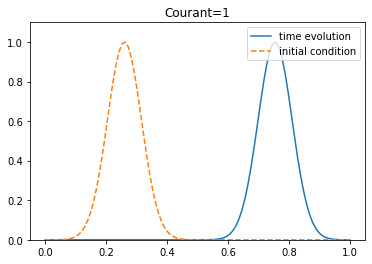

In [29]:
res = simulate_advetion(initFunc=gauss, Co=1, steps=50)
animate(res, "out/task2_gauss_co_1", title="Courant=1")
res

MovieWriter imagemagick unavailable; using Pillow instead.


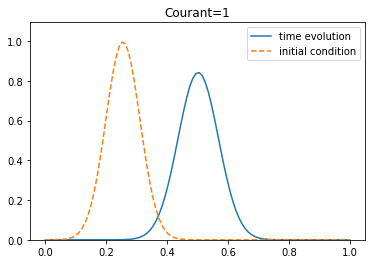

In [16]:
res = simulate_advetion(initFunc=gauss, Co=0.5, steps=50)
animate(res, "out/task2_gauss_co_0.5", title="Courant=1")

MovieWriter imagemagick unavailable; using Pillow instead.


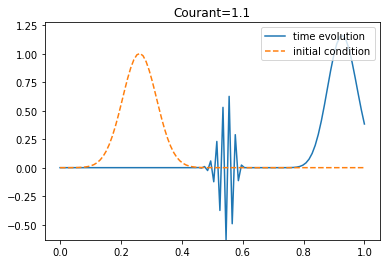

In [17]:
res = simulate_advetion(initFunc=gauss, Co=1.12, steps=60)
animate(res, "out/task2_gauss_co_1.1", title="Courant=1.1")

## Task 2 - Square Pulses

MovieWriter imagemagick unavailable; using Pillow instead.


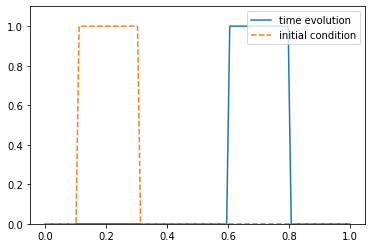

In [18]:
res = simulate_advetion(initFunc=square, Co=1, steps=50)
animate(res, "out/task2_square_co_1")

MovieWriter imagemagick unavailable; using Pillow instead.


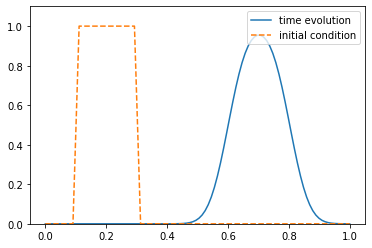

In [19]:
res = simulate_advetion(initFunc=square, Co=0.5, steps=100)
animate(res, "out/task2_square_co_0.5")

MovieWriter imagemagick unavailable; using Pillow instead.


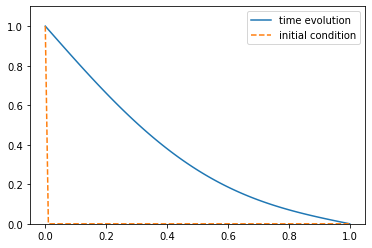

In [20]:
res = np.loadtxt("out/Nx_100_dt_10_numIter_10000_task_2.txt")
animate(res, "out/Nx_100_dt_10_numIter_10000_task_2")

Time spent calculatiung: 0.04694199562072754s


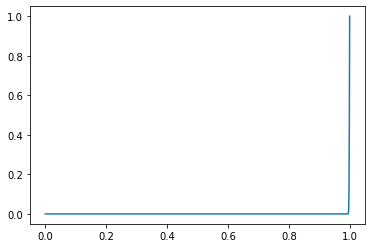

In [21]:
import time
import numpy as np
import matplotlib.pyplot as plt

def analytical_sol(t, points=100, n_max=100):
    x_vals = np.linspace(1,0,points)
    n = np.arange(0, n_max+1, 1)

    # create vector with alternating signs so we dont need (-1)^n
    signs = np.empty((n_max+1,),int)
    signs[::2] = 1
    signs[1::2] = -1

    # pull out redundant calculations
    t = 10**(-6)*t
    pi2t = np.pi*np.pi*t
    

    # solution for a single point
    def analytical_sol_single(x):    
        return 1-2*np.sum(
           signs / ((n+0.5)*np.pi) * np.cos((n+0.5)*np.pi*x) * np.exp( -(n*n+n+0.25) * pi2t)
        )
    
    # vectorize over x_vals for parallel performance
    vectorized = np.vectorize(analytical_sol_single)
    return vectorized(x_vals)




points = 1000
distance = np.linspace(1,0, points)

start = time.time()
C = analytical_sol(t=1, points=points, n_max=1000)
end = time.time()

print(f"Time spent calculatiung: {end-start}s")
plt.plot(distance,C)

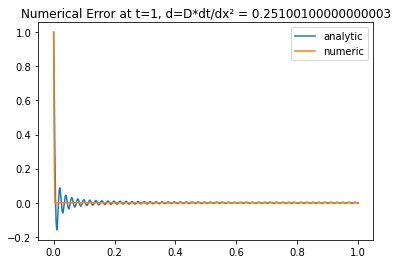

In [26]:
import task1_hickel as task1
import animate

Nx = 500
dt = 1
num_iter = 300
printmod = 1
filename ="temp.txt"

result_numeric = task1.run(Nx, dt, 1, num_iter, printmod, filename)

t = 1
result_analitic = analytical_sol(t, Nx, 100)

d = 10**(-6)*dt/(1/(Nx+1))**2

plt.plot(np.linspace(0,1, Nx), result_analitic, label="analytic")
plt.plot(np.linspace(0,1, Nx), result_numeric[t], label="numeric")

#plt.plot(np.abs(result_analitic-result_numeric[t]))
plt.title(f"Numerical Error at t={t}, d=D*dt/dx² = {d}")
plt.legend()
